This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

### OPERA HDF5 (ODIM_H5)

In [1]:
import wradlib as wrl
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

[HDF5](https://www.hdfgroup.org/solutions/hdf5/) is a data model, library, and file format for storing and managing data. The [OPERA program](https://www.eumetnet.eu/activities/observations-programme/current-activities/opera/) developed a convention (or information model) on how to store and exchange radar data in hdf5 format. It is based on the work of [COST Action 717](https://www.cost.eu/actions/717/) and is used e.g. in real-time operations in the Nordic European countries. The OPERA Data and Information Model (ODIM) is documented [here under OPERA Publications](https://www.eumetnet.eu/activities/observations-programme/current-activities/opera/). Make use of these documents in order to understand the organization of OPERA hdf5 files!

<div class="alert alert-warning">

**Note** <br>
    
For radar data in ODIM_H5 format the [openradar community](https://openradarscience.org/) published [xradar](https://docs.openradarscience.org/projects/xradar/en/latest/) where xarray-based readers/writers are implemented. That particular code was ported from $\omega radlib$ to xradar. Please refer to xradar for enhancements for polar radar.    
    
From $\omega radlib$ version 1.19 `ODIM_H5` reading code is imported from [xradar](https://github.com/openradar/xradar)-package whenever and wherever necessary.
    
Please read the more indepth notebook [odim_backend](../backends/odim_backend.ipynb).
    
</div>

The hierarchical nature of HDF5 can be described as being similar to directories, files, and links on a hard-drive. Actual metadata are stored as so-called *attributes*, and these attributes are organized together in so-called *groups*. Binary data are stored as so-called *datasets*. As for ODIM_H5, the ``root`` (or top level) group contains three groups of metadata: these are called ``what`` (object, information model version, and date/time information), ``where`` (geographical information), and ``how`` (quality and optional/recommended metadata). For a very simple product, e.g. a CAPPI, the data is organized in a group called ``dataset1`` which contains another group called ``data1`` where the actual binary data are found in ``data``. In analogy with a file system on a hard-disk, the HDF5 file containing this simple product is organized like this:

```
    /
    /what
    /where
    /how
    /dataset1
    /dataset1/data1
    /dataset1/data1/data
```

The philosophy behind the $\omega radlib$ interface to OPERA's data model is very straightforward: $\omega radlib$ simply translates the complete file structure to *one* dictionary and returns this dictionary to the user. Thus, the potential complexity of the stored data is kept and it is left to the user how to proceed with this data. The keys of the output dictionary are strings that correspond to the "directory trees" shown above. Each key ending with ``/data`` points to a Dataset (i.e. a numpy array of data). Each key ending with ``/what``, ``/where`` or ``/how`` points to another dictionary of metadata. The entire output can be obtained by:

In [2]:
fpath = "hdf5/knmi_polar_volume.h5"
f = wrl.util.get_wradlib_data_file(fpath)
fcontent = wrl.io.read_opera_hdf5(f)

The user should inspect the output obtained from his or her hdf5 file in order to see how access those items which should be further processed. In order to get a readable overview of the output dictionary, one can use the pretty printing module:

In [3]:
# which keyswords can be used to access the content?
print(fcontent.keys())
# print the entire content including values of data and metadata
# (numpy arrays will not be entirely printed)
print(fcontent["dataset1/data1/data"])

dict_keys(['dataset1/data1/data', 'dataset1/data1/what', 'dataset1/what', 'dataset1/where', 'dataset10/data1/data', 'dataset10/data1/what', 'dataset10/what', 'dataset10/where', 'dataset11/data1/data', 'dataset11/data1/what', 'dataset11/what', 'dataset11/where', 'dataset12/data1/data', 'dataset12/data1/what', 'dataset12/what', 'dataset12/where', 'dataset13/data1/data', 'dataset13/data1/what', 'dataset13/what', 'dataset13/where', 'dataset14/data1/data', 'dataset14/data1/what', 'dataset14/what', 'dataset14/where', 'dataset2/data1/data', 'dataset2/data1/what', 'dataset2/what', 'dataset2/where', 'dataset3/data1/data', 'dataset3/data1/what', 'dataset3/what', 'dataset3/where', 'dataset4/data1/data', 'dataset4/data1/what', 'dataset4/what', 'dataset4/where', 'dataset5/data1/data', 'dataset5/data1/what', 'dataset5/what', 'dataset5/where', 'dataset6/data1/data', 'dataset6/data1/what', 'dataset6/what', 'dataset6/where', 'dataset7/data1/data', 'dataset7/data1/what', 'dataset7/what', 'dataset7/where

Please note that in order to experiment with such datasets, you can download hdf5 sample data from the [OPERA](https://www.eumetnet.eu/activities/observations-programme/current-activities/opera/) or use the example data provided with the [wradlib-data](https://github.com/wradlib/wradlib-data/) repository.

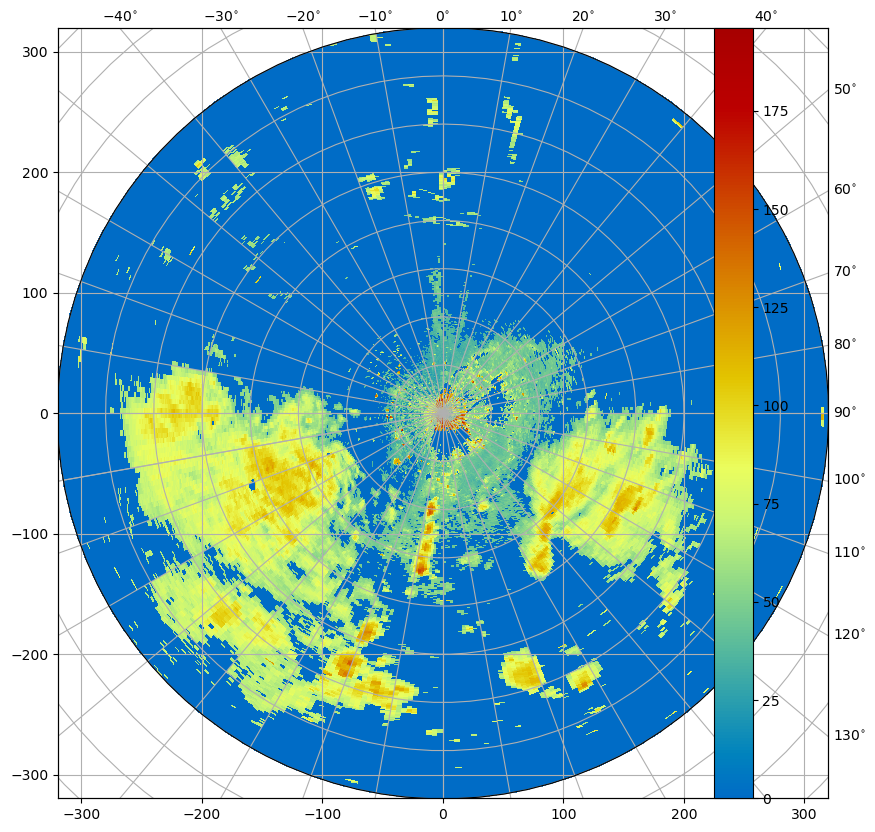

In [4]:
fig = plt.figure(figsize=(10, 10))
da = wrl.georef.create_xarray_dataarray(
    fcontent["dataset1/data1/data"]
).wrl.georef.georeference()
im = da.wrl.vis.plot(fig=fig, crs="cg")